In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('eplmatches.csv')

*Season_End_Year* - Year end for season

*Wk* - Week number of match

*Date* - Date of the match

*Home* - Home team name

*HomeGoals* - Home team goals

*AwayGoals* - Away team goal

*Away* - Away team name

*FTR* - Did Home/Away team won the match or did it end in a draw


In [ ]:
df.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [ ]:
df.tail()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
11641,2022,9,2021-10-23,Leeds United,1,1,Wolves,D
11642,2022,9,2021-10-23,Brighton,1,4,Manchester City,A
11643,2022,9,2021-10-24,West Ham,1,0,Tottenham,H
11644,2022,9,2021-10-24,Brentford,1,2,Leicester City,A
11645,2022,9,2021-10-24,Manchester Utd,0,5,Liverpool,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11646 entries, 0 to 11645
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  11646 non-null  int64 
 1   Wk               11646 non-null  int64 
 2   Date             11646 non-null  object
 3   Home             11646 non-null  object
 4   HomeGoals        11646 non-null  int64 
 5   AwayGoals        11646 non-null  int64 
 6   Away             11646 non-null  object
 7   FTR              11646 non-null  object
dtypes: int64(4), object(4)
memory usage: 728.0+ KB


In [ ]:
team_names = df.groupby(['Home']).groups.keys()
team_names

dict_keys(['Arsenal', 'Aston Villa', 'Barnsley', 'Birmingham City', 'Blackburn', 'Blackpool', 'Bolton', 'Bournemouth', 'Bradford City', 'Brentford', 'Brighton', 'Burnley', 'Cardiff City', 'Charlton Ath', 'Chelsea', 'Coventry City', 'Crystal Palace', 'Derby County', 'Everton', 'Fulham', 'Huddersfield', 'Hull City', 'Ipswich Town', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Middlesbrough', 'Newcastle Utd', 'Norwich City', "Nott'ham Forest", 'Oldham Athletic', 'Portsmouth', 'QPR', 'Reading', 'Sheffield Utd', 'Sheffield Weds', 'Southampton', 'Stoke City', 'Sunderland', 'Swansea City', 'Swindon Town', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wigan Athletic', 'Wimbledon', 'Wolves'])

In [ ]:
df['Home'].value_counts() #the number of games at home

Tottenham          576
Arsenal            576
Liverpool          576
Everton            576
Chelsea            576
Manchester Utd     576
Aston Villa        519
Newcastle Utd      517
West Ham           498
Manchester City    481
Southampton        443
Blackburn          348
Leicester City     306
Sunderland         304
Middlesbrough      287
Fulham             285
Leeds United       272
Crystal Palace     251
West Brom          247
Bolton             247
Norwich City       196
Stoke City         190
Coventry City      177
Wimbledon          158
Sheffield Weds     158
Wigan Athletic     152
Charlton Ath       152
Watford            152
Burnley            152
Wolves             152
QPR                139
Portsmouth         133
Swansea City       133
Derby County       133
Birmingham City    133
Ipswich Town       101
Sheffield Utd       99
Nott'ham Forest     99
Brighton            95
Hull City           95
Bournemouth         95
Reading             57
Oldham Athletic     42
Cardiff Cit

In [ ]:
m_unt = df['Home']=='Manchester Utd'
df[m_unt]['HomeGoals'].sum()

1214

In [ ]:
m_unt = df['Away']=='Manchester Utd'
df[m_unt]['AwayGoals'].sum()

971

In [ ]:
import operator

home_goal = {}
for i in team_names:
  t = df['Home']==i
  h_goals = df[t]['HomeGoals'].sum()
  home_goal.update({i : h_goals})
home_goal = sorted(home_goal.items(), 
                   key=operator.itemgetter(1), 
                   reverse = True)
home_goal[:3]

[('Manchester Utd', 1214), ('Liverpool', 1156), ('Arsenal', 1154)]

In [ ]:
away_goal = {}
for i in team_names:
  t = df['Away']==i
  h_goals = df[t]['AwayGoals'].sum()
  away_goal.update({i : h_goals})
away_goal = sorted(away_goal.items(), 
                   key=operator.itemgetter(1), 
                   reverse = True)
away_goal[:3]

[('Manchester Utd', 971), ('Liverpool', 865), ('Arsenal', 863)]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

df.drop(columns = ['Date'], inplace = True)
df.head()

,Season_End_Year,Wk,Home,HomeGoals,AwayGoals,Away,FTR,Day,Month,Year
0,1993,1,Coventry City,2,1,Middlesbrough,H,Saturday,August,1992
1,1993,1,Leeds United,2,1,Wimbledon,H,Saturday,August,1992
2,1993,1,Sheffield Utd,2,1,Manchester Utd,H,Saturday,August,1992
3,1993,1,Crystal Palace,3,3,Blackburn,D,Saturday,August,1992
4,1993,1,Arsenal,2,4,Norwich City,A,Saturday,August,1992


In [ ]:
df["Day"].value_counts()

Saturday     6693
Sunday       2254
Wednesday    1067
Monday        781
Tuesday       594
Friday        134
Thursday      123
Name: Day, dtype: int64

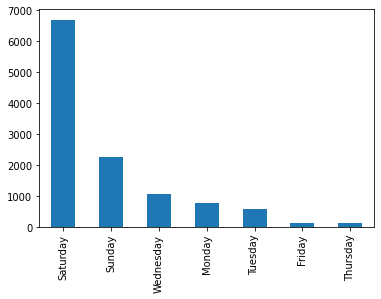

In [ ]:
df["Day"].value_counts().plot.bar()

In [ ]:
df["Month"].value_counts()

December     1688
April        1406
January      1148
November     1144
March        1119
October      1078
September    1074
February     1072
August       1021
May           804
July           66
June           26
Name: Month, dtype: int64

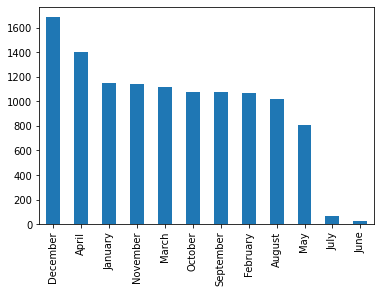

In [ ]:
df["Month"].value_counts().plot.bar()

In [ ]:
df["Year"].value_counts()

1993    469
1994    456
1995    426
2021    408
2017    401
2006    394
2004    392
2012    391
2002    391
2000    390
1997    389
2015    380
2014    380
2008    379
2019    379
2016    378
2009    378
2011    377
1996    375
1999    375
2005    374
2010    374
2001    373
2013    372
1998    372
2018    371
2007    371
2003    359
2020    336
1992    239
2022    197
Name: Year, dtype: int64

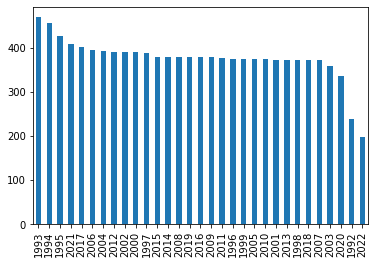

In [ ]:
df["Year"].value_counts().plot.bar()

In [ ]:
h_st_teams = {}

win = 0
draw = 0
lost = 0
for year in df["Year"]:
  y = df["Year"]==year
  for team in team_names:
    a = df['Home']==team
    for j in df[a]["FTR"]:
      if  j== 'H':
        win+=1
      elif j == 'A':
        lost+=1
      else:
        draw+=1
  h_st_teams.update({i : [win, draw, lost]})
  win = 0
  draw = 0
  lost = 0

In [ ]:
h_st_teams = sorted(h_st_teams.items(), 
                    key=operator.itemgetter(1), 
                    reverse = True)
h_st_teams[:3]

[('Manchester Utd', [402, 110, 64]),
 ('Arsenal', [368, 131, 77]),
 ('Liverpool', [363, 137, 76])]

In [ ]:
df_1992 = df[df['Season_End_Year']==1993]

In [ ]:
df[230:242]

,Season_End_Year,Wk,Home,HomeGoals,AwayGoals,Away,FTR,Day,Month,Year
230,1993,28,Nott'ham Forest,1,3,Blackburn,A,Wednesday,April,1993
231,1993,29,Southampton,2,1,Liverpool,H,Saturday,February,1993
232,1993,29,Leeds United,2,0,Oldham Athletic,H,Saturday,February,1993
233,1993,29,Chelsea,0,1,Aston Villa,A,Saturday,February,1993
234,1993,29,Ipswich Town,0,1,Middlesbrough,A,Tuesday,March,1993
235,1993,29,Sheffield Utd,6,0,Tottenham,H,Tuesday,March,1993
236,1993,29,Coventry City,1,0,Sheffield Weds,H,Wednesday,March,1993
237,1993,29,Everton,2,1,Blackburn,H,Wednesday,March,1993
238,1993,29,Nott'ham Forest,0,3,Norwich City,A,Wednesday,March,1993
239,1993,29,Manchester City,1,1,Wimbledon,D,Wednesday,April,1993


In [ ]:
m_u_stat_h = {}

win = 0
a = df['Home']=="Manchester Utd"
for i in range (1993, 2023):
  df_year = df[df['Season_End_Year']==i]
  for j in df_year[a]["FTR"]:
    if  j== 'H': 
      win+=1
  m_u_stat_h.update({i : win})
  win = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
m_u_stat_h

{1993: 14,
 1994: 14,
 1995: 16,
 1996: 15,
 1997: 12,
 1998: 13,
 1999: 14,
 2000: 15,
 2001: 15,
 2002: 11,
 2003: 16,
 2004: 12,
 2005: 12,
 2006: 13,
 2007: 15,
 2008: 17,
 2009: 16,
 2010: 16,
 2011: 18,
 2012: 15,
 2013: 16,
 2014: 9,
 2015: 14,
 2016: 12,
 2017: 8,
 2018: 15,
 2019: 10,
 2020: 10,
 2021: 9,
 2022: 10}

In [ ]:
m_u_stat_a = {}

win = 0
a = df['Away']=="Manchester Utd"
for i in range (1993, 2023):
  df_year = df[df['Season_End_Year']==i]
  for j in df_year[a]["FTR"]:
    if  j== 'A': 
      win+=1
  m_u_stat_a.update({i : win})
  win = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
m_u_stat_a

{1993: 10,
 1994: 13,
 1995: 10,
 1996: 10,
 1997: 9,
 1998: 10,
 1999: 8,
 2000: 13,
 2001: 9,
 2002: 13,
 2003: 9,
 2004: 11,
 2005: 10,
 2006: 12,
 2007: 13,
 2008: 10,
 2009: 12,
 2010: 11,
 2011: 5,
 2012: 13,
 2013: 12,
 2014: 10,
 2015: 6,
 2016: 7,
 2017: 10,
 2018: 10,
 2019: 9,
 2020: 8,
 2021: 12,
 2022: 6}

In [ ]:
import collections

my_dict = [m_u_stat_a, m_u_stat_h]

counter = collections.Counter()
for d in my_dict:
    counter.update(d)

res = dict(counter)

man_unt_win = pd.DataFrame(list(res.items()), 
                       columns = ['Year','Win'])
man_unt_win.head()

,Year,Win
0,1993,24
1,1994,27
2,1995,26
3,1996,25
4,1997,21


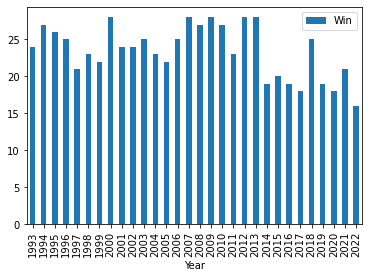

In [ ]:
man_unt_win.plot.bar(x = 'Year', y = "Win")

In [ ]:
man_unt_win.loc[man_unt_win['Win'].idxmax()]

Year    2000
Win       28
Name: 7, dtype: int64

In [ ]:
m_u_stat_h = {}

draw = 0
a = df['Home']=="Manchester Utd"
for i in range (1993, 2023):
  df_year = df[df['Season_End_Year']==i]
  for j in df_year[a]["FTR"]:
    if  j== 'D': 
      draw+=1
  m_u_stat_a.update({i : draw})
  draw = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
m_u_stat_a = {}

draw = 0
a = df['Away']=="Manchester Utd"
for i in range (1993, 2023):
  df_year = df[df['Season_End_Year']==i]
  for j in df_year[a]["FTR"]:
    if  j== 'D': 
      draw+=1
  m_u_stat_a.update({i : draw})
  draw = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
import collections

my_dict = [m_u_stat_a, m_u_stat_h]

counter = collections.Counter()
for d in my_dict:
    counter.update(d)

res = dict(counter)

man_unt_draw = pd.DataFrame(list(res.items()), 
                       columns = ['Year','Draw'])
man_unt_draw.head()

,Year,Draw
0,1993,7
1,1994,5
2,1995,6
3,1996,3
4,1997,7


In [ ]:
m_u_stat_h = {}

lost = 0
a = df['Home']=="Manchester Utd"
for i in range (1993, 2023):
  df_year = df[df['Season_End_Year']==i]
  for j in df_year[a]["FTR"]:
    if  j== 'A': 
      lost+=1
  m_u_stat_a.update({i : lost})
  lost = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
m_u_stat_h = {}

lost = 0
a = df['Away']=="Manchester Utd"
for i in range (1993, 2023):
  df_year = df[df['Season_End_Year']==i]
  for j in df_year[a]["FTR"]:
    if  j== 'H': 
      lost+=1
  m_u_stat_a.update({i : lost})
  lost = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [ ]:
import collections

my_dict = [m_u_stat_a, m_u_stat_h]

counter = collections.Counter()
for d in my_dict:
    counter.update(d)

res = dict(counter)

man_unt_lost = pd.DataFrame(list(res.items()), 
                       columns = ['Year','Lost'])
man_unt_lost.head()

,Year,Lost
0,1993,4
1,1994,3
2,1995,5
3,1996,6
4,1997,3


In [ ]:
man_unt = man_unt_win.merge(man_unt_draw, how='outer')
man_unt.head()

,Year,Win,Draw
0,1993,24,7
1,1994,27,5
2,1995,26,6
3,1996,25,3
4,1997,21,7


In [ ]:
man_unt = man_unt.merge(man_unt_lost, how='outer')
man_unt.head()

,Year,Win,Draw,Lost
0,1993,24,7,4
1,1994,27,5,3
2,1995,26,6,5
3,1996,25,3,6
4,1997,21,7,3


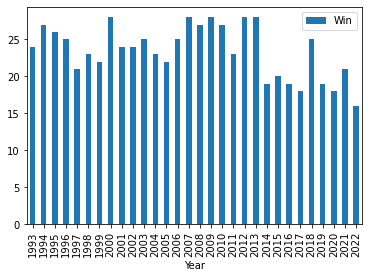

In [ ]:
man_unt.plot.bar(x="Year", y = "Win")

In [ ]:
man_unt.loc[man_unt['Win'].idxmax()]

Year    2000
Win       28
Draw       3
Lost       3
Name: 7, dtype: int64

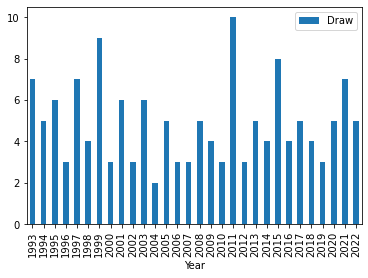

In [ ]:
man_unt.plot.bar(x="Year", y = "Draw")

In [ ]:
man_unt.loc[man_unt['Draw'].idxmax()]

Year    2011
Win       23
Draw      10
Lost       4
Name: 18, dtype: int64

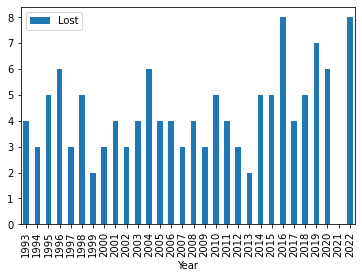

In [ ]:
man_unt.plot.bar(x="Year", y = "Lost")

In [ ]:
man_unt.loc[man_unt['Lost'].idxmax()]

Year    2016
Win       19
Draw       4
Lost       8
Name: 23, dtype: int64